# Data wrangling

In [1]:
# Standard library imports
import glob
import shutil
from pathlib import Path

# PyPI imports
import kagglehub
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from skimage.io import imread
import cv2 

/home/vscode/.local/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# 1. Data download

In [2]:
%%time

# Download latest version
path=kagglehub.dataset_download('paultimothymooney/breast-histopathology-images')

print(f'Path to dataset files: {path}\n')

100%|██████████| 3.10G/3.10G [00:55<00:00, 59.9MB/s]


Extracting files...
Path to dataset files: /home/vscode/.cache/kagglehub/datasets/paultimothymooney/breast-histopathology-images/versions/1


# 2. Data re-structuring

Right now, the data exists in a set of numbered directories, one for each patient. In each patient directory there are two sub-directories `0` and `1` containing IDC negative and IDC positive images. We need to collect all of the IDC negative images and IDC positive images into their own directories. Let's write a function to do all of that.

In [3]:
def restructure_data(path: str) -> bool:
    '''Takes string path to data directory from KaggleHub download call, moves all IDC 
    negative and positive images into corresponding directories in project data folder.'''

    # Get a list of patient directories
    patients=glob.glob(f'{path}/*')

    # Set up target directories for file copy
    idc_negative_directory='../data/images/idc_negative/'
    idc_positive_directory='../data/images/idc_positive/'

    Path(idc_negative_directory).mkdir(parents=True, exist_ok=True)
    Path(idc_positive_directory).mkdir(parents=True, exist_ok=True)

    # Loop on the patient directories and copy the '0' images to the idc_negative directory
    # and the '1' images to the idc_positive directory
    for patient in patients:

        # Copy the idc negative images from this patient
        idc_negative_images=glob.glob(f'{patient}/0/*.png')

        for image in idc_negative_images:
            shutil.copy(image, idc_negative_directory)

        # Copy the idc positive images from this patient
        idc_positive_images=glob.glob(f'{patient}/1/*.png')

        for image in idc_positive_images:
            shutil.copy(image, idc_positive_directory)

In [4]:
%%time

restructure_data(path)

CPU times: user 15.7 s, sys: 54.1 s, total: 1min 9s
Wall time: 3min 20s


In [10]:
images = glob.glob(f'{path}/**/*.png', recursive = True)
print(f'Number of images: {len(images)}')
images[0]

Number of images: 555048


'/home/vscode/.cache/kagglehub/datasets/paultimothymooney/breast-histopathology-images/versions/1/9226/1/9226_idx5_x651_y2101_class1.png'

NameError: name 'cv2' is not defined

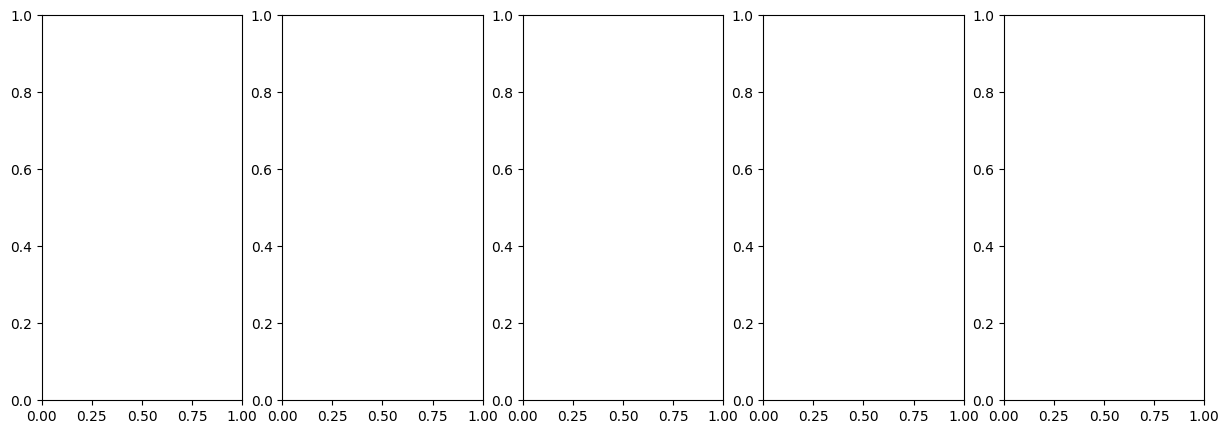

In [11]:
fig, axes = plt.subplots(1, 5, figsize=(15, 5))
for i in range(5):
    img = cv2.imread(images[i])
    axes[i].imshow(img)

Done!

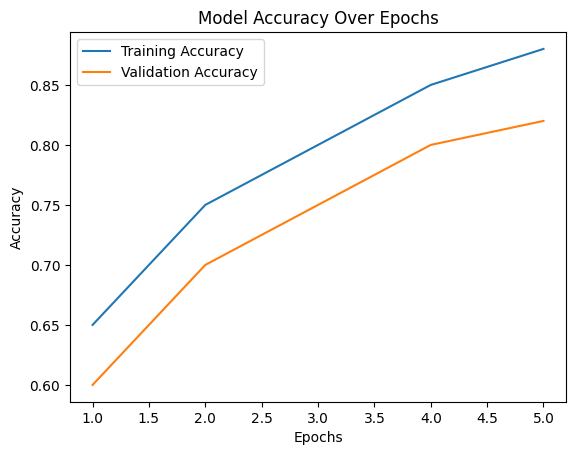

In [1]:
import matplotlib.pyplot as plt

epochs = [1, 2, 3, 4, 5]
train_acc = [0.65, 0.75, 0.80, 0.85, 0.88]
val_acc = [0.60, 0.70, 0.75, 0.80, 0.82]

plt.plot(epochs, train_acc, label='Training Accuracy')
plt.plot(epochs, val_acc, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Over Epochs')
plt.legend()
plt.show()

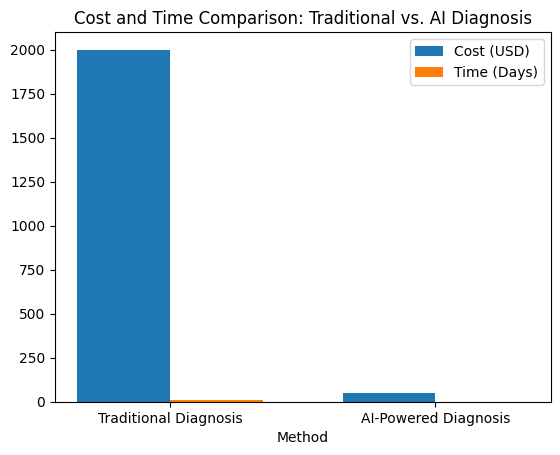

In [4]:
import matplotlib.pyplot as plt
import numpy as np

methods = ['Traditional Diagnosis', 'AI-Powered Diagnosis']
costs = [2000, 50]
time = [7, 0.01]

x = np.arange(len(methods))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, costs, width, label='Cost (USD)')
rects2 = ax.bar(x + width/2, time, width, label='Time (Days)')

ax.set_xlabel('Method')
ax.set_title('Cost and Time Comparison: Traditional vs. AI Diagnosis')
ax.set_xticks(x)
ax.set_xticklabels(methods)
ax.legend()

plt.show()

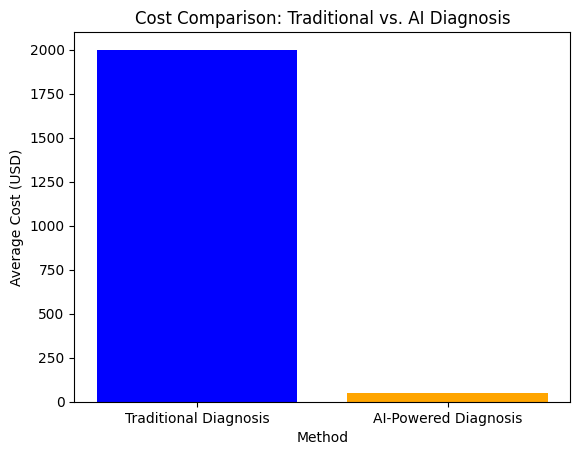

In [3]:
import matplotlib.pyplot as plt

methods = ['Traditional Diagnosis', 'AI-Powered Diagnosis']
costs = [2000, 50]

plt.bar(methods, costs, color=['blue', 'orange'])
plt.xlabel('Method')
plt.ylabel('Average Cost (USD)')
plt.title('Cost Comparison: Traditional vs. AI Diagnosis')
plt.show()

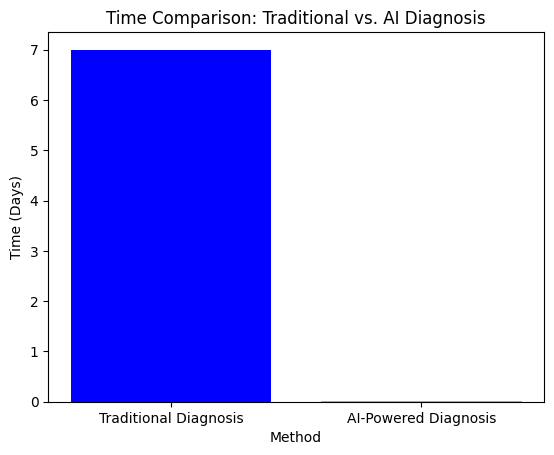

In [2]:
import matplotlib.pyplot as plt

methods = ['Traditional Diagnosis', 'AI-Powered Diagnosis']
time = [7, 0.01]

plt.bar(methods, time, color=['blue', 'orange'])
plt.xlabel('Method')
plt.ylabel('Time (Days)')
plt.title('Time Comparison: Traditional vs. AI Diagnosis')
plt.show()

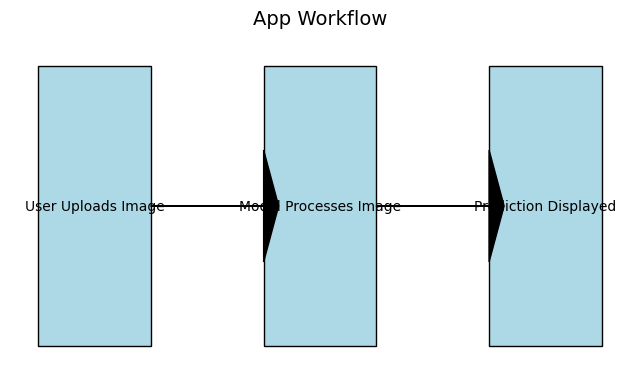

In [6]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Create figure and axis
fig, ax = plt.subplots(figsize=(8, 4))

# Define box positions and sizes
box_width = 1.5
box_height = 0.5
x_positions = [1, 4, 7]
y_position = 1

# Draw boxes
for i, step in enumerate(["User Uploads Image", "Model Processes Image", "Prediction Displayed"]):
    ax.add_patch(patches.Rectangle((x_positions[i], y_position), box_width, box_height, edgecolor='black', facecolor='lightblue'))
    plt.text(x_positions[i] + box_width/2, y_position + box_height/2, step, ha='center', va='center', fontsize=10)

# Draw arrows
for i in range(len(x_positions) - 1):
    plt.arrow(x_positions[i] + box_width, y_position + box_height/2, x_positions[i+1] - (x_positions[i] + box_width), 0, 
              head_width=0.2, head_length=0.2, fc='black', ec='black')

# Remove axes
ax.axis('off')

# Set title
plt.title("App Workflow", fontsize=14, pad=20)

# Show plot
plt.show()






In [8]:
import plotly.graph_objects as go

# Create gauge chart
fig = go.Figure(go.Indicator(
    mode = "gauge+number",
    value = 82,  # Confidence level
    title = {'text': "Confidence Level"},
    gauge = {
        'axis': {'range': [0, 100], 'tickwidth': 1, 'tickcolor': "black"},
        'bar': {'color': "blue"},
        'steps': [
            {'range': [0, 50], 'color': "lightgray"},
            {'range': [50, 82], 'color': "lightblue"}
        ],
        'threshold': {
            'line': {'color': "red", 'width': 4},
            'thickness': 0.75,
            'value': 82
        }
    }
))

# Update layout
fig.update_layout(
    title = "Model Confidence Level: 82%",
    font = {'size': 16}
)

# Show plot
fig.show()

ModuleNotFoundError: No module named 'plotly.validators.layout.title'

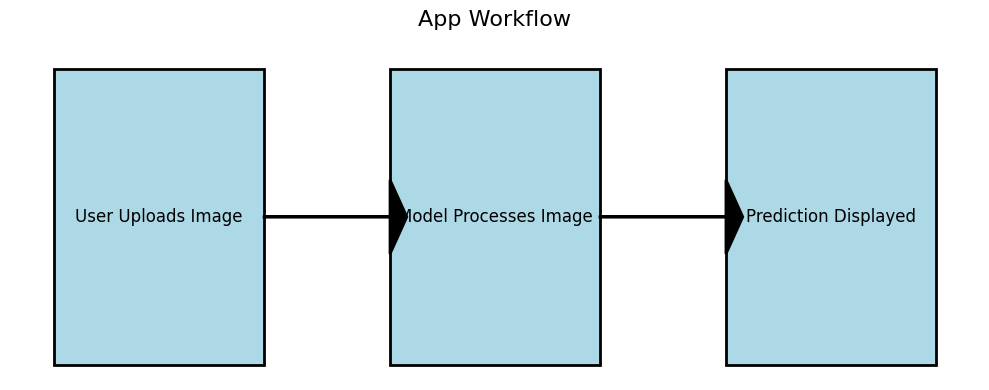

In [10]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
# Create figure and axis
fig, ax = plt.subplots(figsize=(10, 4))
# Define box positions and sizes
box_width = 2.5  # Wider boxes to fit text
box_height = 0.8  # Taller boxes
x_positions = [1, 5, 9]  # More spacing between boxes
y_position = 0.2
# Define steps
steps = ["User Uploads Image", "Model Processes Image", "Prediction Displayed"]
# Draw boxes
for i, step in enumerate(steps):
    ax.add_patch(patches.Rectangle(
        (x_positions[i], y_position), box_width, box_height,
        edgecolor='black', facecolor='lightblue', lw=2
    ))
    plt.text(
        x_positions[i] + box_width/2, y_position + box_height/2, step,
        ha='center', va='center', fontsize=12, color='black'  # Larger font and black text
    )
# Draw arrows
for i in range(len(x_positions) - 1):
    plt.arrow(
        x_positions[i] + box_width, y_position + box_height/2,
        x_positions[i+1] - (x_positions[i] + box_width), 0,
        head_width=0.2, head_length=0.2, fc='black', ec='black', lw=2
    )
# Remove axes
ax.axis('off')
# Set title
plt.title("App Workflow", fontsize=16, pad=20, color='black')
# Adjust layout
plt.tight_layout()
# Show plot
plt.show()



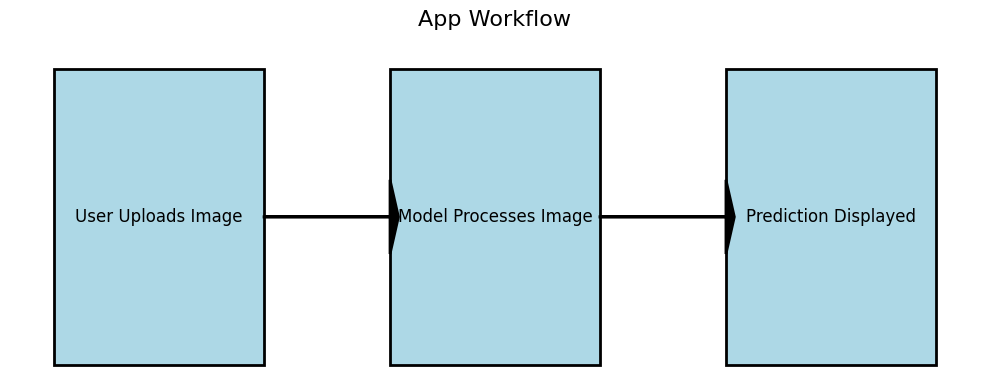

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
# Create figure and axis
fig, ax = plt.subplots(figsize=(10, 4))
# Define box positions and sizes
box_width = 2.5  # Wider boxes to fit text
box_height = 0.8  # Taller boxes
x_positions = [1, 5, 9]  # More spacing between boxes
y_position = 1
# Define steps
steps = ["User Uploads Image", "Model Processes Image", "Prediction Displayed"]
# Draw boxes
for i, step in enumerate(steps):
    ax.add_patch(patches.Rectangle(
        (x_positions[i], y_position), box_width, box_height,
        edgecolor='black', facecolor='lightblue', lw=2
    ))
    plt.text(
        x_positions[i] + box_width/2, y_position + box_height/2, step,
        ha='center', va='center', fontsize=12, color='black'  # Larger font and black text
    )
# Draw arrows
for i in range(len(x_positions) - 1):
    plt.arrow(
        x_positions[i] + box_width , y_position + box_height/2,
        x_positions[i+1] - (x_positions[i] + box_width), 0,
        head_width=0.2, head_length=0.2, fc='black', ec='black', lw=2
    )
# Remove axes
ax.axis('off')
# Set title
plt.title("App Workflow", fontsize=16, pad=20, color='black')
# Adjust layout
plt.tight_layout()
# Show plot
plt.show()

/tmp/ipykernel_6098/3917567263.py:16: UserWarning:

Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.



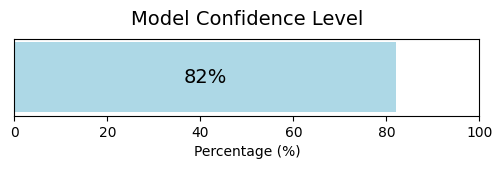

In [15]:
# Data
confidence_level = 82  # Confidence level in percentage
labels = ['Confidence Level']
# Create horizontal bar chart
plt.figure(figsize=(6, 1))  # Adjust figure size for simplicity
plt.barh(labels, confidence_level, color='lightblue', height=0.5)
# Add text annotation
plt.text(confidence_level / 2, 0, f'{confidence_level}%', ha='center', va='center', fontsize=14, color='black')
# Set limits and labels
plt.xlim(0, 100)  # Confidence level ranges from 0% to 100%
plt.xlabel('Percentage (%)')
plt.title('Model Confidence Level', fontsize=14, pad=10)
# Remove y-axis labels
plt.yticks([])
# Show plot
plt.tight_layout()
plt.show()


